In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import datetime

In [19]:
entity = "evangeorgerex"
project_name = "fwal"
sweep_id = "xd36y8wm"

# Fetch the sweep
api = wandb.Api()
sweep = api.sweep(f"{entity}/{project_name}/{sweep_id}")


In [25]:
runpath = "evangeorgerex/fwal/c4rpo9nd"
run = api.run(runpath)

In [27]:
hist = run.summary['best_mask_parameters']

In [29]:
hist

{'_type': 'histogram', 'values': [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 4, 7, 11, 12, 25, 49, 107, 127, 154, 105, 79, 50, 24, 7, 5, 8, 3], 'bins': [-1.9466373920440674, -1.7722136974334717, -1.597790002822876, -1.4233661890029907, -1.248942494392395, -1.0745187997817993, -0.9000950455665588, -0.7256712913513184, -0.5512475967407227, -0.37682387232780457, -0.20240014791488647, -0.027976423501968384, 0.1464473009109497, 0.3208710253238678, 0.4952947497367859, 0.6697185039520264, 0.8441421985626221, 1.0185658931732178, 1.1929895877838135, 1.3674134016036987, 1.5418370962142944, 1.7162607908248901, 1.8906846046447754, 2.065108299255371, 2.239531993865967, 2.4139556884765625, 2.588379383087158, 2.762803077697754, 2.9372267723083496, 3.1116507053375244, 3.28607439994812, 3.460498094558716, 3.6349217891693115]}

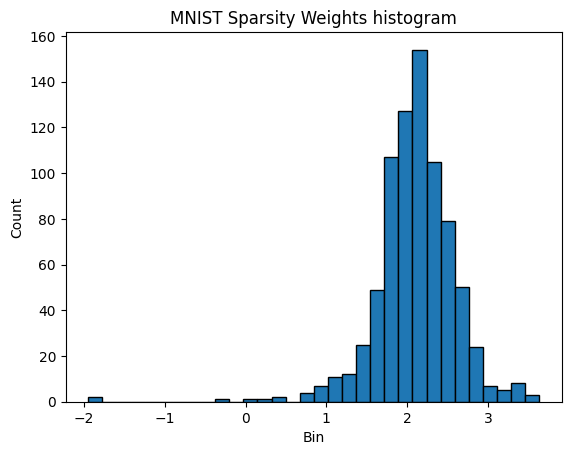

In [31]:
import matplotlib.pyplot as plt

# Histogram data
values = [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 4, 7, 11, 12, 25, 49, 107, 127, 154, 105, 79, 50, 24, 7, 5, 8, 3]
bins = [-1.9466373920440674, -1.7722136974334717, -1.597790002822876, -1.4233661890029907, -1.248942494392395, -1.0745187997817993, -0.9000950455665588, -0.7256712913513184, -0.5512475967407227, -0.37682387232780457, -0.20240014791488647, -0.027976423501968384, 0.1464473009109497, 0.3208710253238678, 0.4952947497367859, 0.6697185039520264, 0.8441421985626221, 1.0185658931732178, 1.1929895877838135, 1.3674134016036987, 1.5418370962142944, 1.7162607908248901, 1.8906846046447754, 2.065108299255371, 2.239531993865967, 2.4139556884765625, 2.588379383087158, 2.762803077697754, 2.9372267723083496, 3.1116507053375244, 3.28607439994812, 3.460498094558716, 3.6349217891693115]

# Calculate bin widths and bin centers
bin_widths = [j - i for i, j in zip(bins[:-1], bins[1:])]
bin_centers = [(i + j) / 2 for i, j in zip(bins[:-1], bins[1:])]

# Plotting
plt.bar(bin_centers, values, width=bin_widths, align='center', edgecolor='black')
plt.xlabel('Bin')
plt.ylabel('Count')
plt.title('MNIST Sparsity Weights histogram')
plt.show()


In [24]:
# Initialize a list to store data
data = []

# Iterate over each run and fetch the required data
for run in sweep.runs:
    config = run.config
    summary_metrics = run.summary
    # You might need to adjust the key names based on your actual data
    try:
        data.append({
            'dataset': config['dataset'],  
            'seed_model_init': config['seed_model_init'], 
            # Add other hyperparameters here as needed
            'normalize_reconstruction': config['normalize_reconstruction'],  
            'balanced_accuracy': summary_metrics['bestmodel_valid/balanced_accuracy'],  # Adjust based on your summary metrics
            # Include other config elements as necessary
        })
    except:
        print(f"Run {run.id} failed")

# Convert the list to a DataFrame
df = pd.DataFrame(data)

df = df[df['dataset'] != 'poly_binarised_decimalised_mod10_synth'] # excliude this dataset

# Group by dataset and other relevant hyperparameters (excluding seed), and calculate the mean of balanced_accuracy across seeds
grouped_df = df.groupby(['dataset', 
                         'normalize_reconstruction'  # Add other hyperparameters here, except 'seed'
                        ]).agg({'balanced_accuracy': 'mean'}).reset_index()

# Now, find the entry with the maximum 'balanced_accuracy' for each 'dataset'
result_df = grouped_df.loc[grouped_df.groupby('dataset')['balanced_accuracy'].idxmax()]

# Display the resulting DataFrame
print(result_df)


Run x5mlx25b failed
Run 6y520ck9 failed
Run fa1xfouk failed
Run 1691mmmr failed
             dataset normalize_reconstruction  balanced_accuracy
0              MNIST  num_non_masked_features           0.980751
2  simple_trig_synth             num_features           0.979334


In [21]:
print(grouped_df)

             dataset normalize_reconstruction  balanced_accuracy
0              MNIST  num_non_masked_features           0.980751
1  simple_trig_synth                     None           0.975825
2  simple_trig_synth             num_features           0.979334
3  simple_trig_synth  num_non_masked_features           0.978480
